<a href="https://colab.research.google.com/github/dohyun93/hongong_mldl/blob/main/3_3_%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특성 공학

3-2 장에서 길이로 $길이^2$ 라는 새로운 특성을 활용해 선형 회귀를 했다.
이렇게 새로운 특성을 뽑아내는 작업을 '특성 공학' (feature engineering) 이라고 한다.

또한 앞 3-2장에서는 길이와 $길이^2$ 라는 하나의 종류에 대한 특성으로 선형 회귀를 했다.
이렇게 하나의 종류 특성으로 여러 특성을 만들어 학습하는 회귀를 '다항 회귀'(Polynomial regression) 라 한다.

반면, 이번장에서는 길이 외에 높이와 두께라는 새로운 종류의 특성을 학습에 활용한다.
즉, 길이/높이/두께 라는 세 종류의 특성으로 무게를 회귀하는 선형 회귀모델을 학습해보며, 이렇게 다수의 종류의 특성으로 학습하는 회귀를 '다중 회귀'(multiple regression)라고 한다.



In [6]:
# pandas 로 csv데이터를 가져와보자

# 1. pandas import
import pandas as pd

# 2. pandas로 df 형식의 csv 가져오기
df = pd.read_csv('https://bit.ly/perch_csv_data')

# 3. df를 numpy로 변경
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [7]:
# 타깃 데이터도 가져오자.
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 훈련/테스트 세트 나누자
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

# 사이킷런은 특성을 만들거나 전처리 하기 위한 다양한 클래스를 제공한다. 이런 클래스를 '변환기(transformer)'라고 한다.

> sklearn 의 모델 클래스에 일관되게 ```fit()```, ```score()```, ```predict()``` 메서드가 있는 것 처럼, 변환기 클래스는 모두 ```fit()```, ```transform()``` 메서드를 제공한다.

In [8]:
# 1. 변환기 PolynomialFeatures 클래스를 사용한다.
from sklearn.preprocessing import PolynomialFeatures

# 예시를 들기 위해 [[2, 3]] 을 변환기 클래스에 넣어보자.
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [9]:
# 2와 3, 서로 곱한 6, 각자 제곱한 4, 9가 생긴걸 알 수 있다.

# 1은 왜 생겼을까?
# 무게 = a * 길이 + b * 높이 + c * 두께 + d * 1 

# 선형 방정식의 절편 d는 항상 값이 1인 특성과 곱해지는 계수라고 할 수 있다.
# 따라서 특성은 (a, b, c, d) = (a, b, c, 1) 가 된다.

# 하지만 사이킷 런은 자동으로 절편 d 를 추가하므로, 굳이 1이라는 특성을 넣어주지 않아도 된다.

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [10]:
# 이제 이 방식으로 train_input을 다시 만들어보자.
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [11]:
# 3개의 클래스였던 학습 데이터가 9개 클래스로 증가했다.
# 각각이 어떤 클래스로 만들어졌는지 확인해보자.

poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [13]:
test_poly = poly.transform(test_input)
poly.get_feature_names()
# 동일한 순서대로 테스트 세트의 인풋도 transform해준다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print("train set: ", lr.score(train_poly, train_target))
print("test set: ", lr.score(test_poly, test_target))

train set:  0.9903183436982124
test set:  0.9714559911594134


In [18]:
# 더 이상 과소적합 문제가 나타나지는 않는다.
# 만약 더 고차원의 특성공학을 사용하면 어떻게 될까?
# PolynomialFeatures 는 'degree'로 특성공학을 할 차원지정이 가능하다.

poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
poly_train = poly.transform(train_input)
poly_test = poly.transform(test_input)
print(poly_train.shape)

(42, 55)


In [20]:
# degree=2일 때 9종류가, degree=5일 때 55종류가 생긴다..
# 이 상태로 학습한 결과를 확인해보자.

lr.fit(poly_train, train_target)
print("train set: ", lr.score(poly_train, train_target))
print("test set: ", lr.score(poly_test, test_target))

train set:  0.9999999999991097
test set:  -144.40579242684848


In [ ]:
# 테스트 세트의 회귀 성능이 매우 안좋게 나왔다.
# 훈련 세트는 1에 거의 가까울 정도의 결과가 나왔는데, 이는 매우매우 과적합 되었다는 의미이다.
# 어떻게 하면 과대적합을 줄일 수 있을 까?

# 규제 (Regulation)

> 규제는 머신러닝 모델이 훈련 세트를 과도하게 학습하지 못하도록 '훼방'하는 것을 말한다.

> 즉, 모델이 훈련 세트에 과대적합하지 않도록 만드는 것이다.

> 선형 회귀 모델의 경우, 특성에 곱해지는 계수의 크기를 '작게' 만드는 일이 규제에 해당한다.

In [23]:
# 먼저 특성들을 정규화 해주어 계수값들이 공정하게 제어될 수 있도록 하자.

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(poly_train)
train_scaled = ss.transform(poly_train)
# 계속 강조되는 것이지만, 훈련 세트의 데이터로 스케일 한 모델 ss를 동일하게 테스트 세트에도 사용해야 한다.
test_scaled = ss.transform(poly_test)

# 선형 회귀 모델에 규제를 추가한 모델을 ```릿지 (Ridge)``` 와 ```라쏘 (lasso)```라고 한다.

> 두 모델은 규제를 가하는 방법이 다르다.

> ```릿지``` 는 *'계수를 제곱한 값'*을 기준으로 규제를 적용한다. 일반적으로 라쏘보다 선호된다.

> ```라쏘``` 는 *'계수의 절댓값'*을 기준으로 규제를 적용한다.



In [26]:
# 1. 릿지 회귀

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print("train (ridge): ", ridge.score(train_scaled, train_target))
print("test (ridge): ", ridge.score(test_scaled, test_target))

train (ridge):  0.9896101671037343
test (ridge):  0.9790693977615391


In [28]:
# degree=5인 점을 감안했을 때, 테스트세트의 성능이 훈련세트의 성능과 유사한 수준인 점을 보았을 때, 과대적합되지 않도록 규제된 것을 알 수 있다.
# 규제의 강도를 매개변수 alpha로 조절할 수 있는데 예시를 들어보자.

# alpha가 커지면 규제 강도가 세지므로, 계수 값을 더 줄이고 과대적합되지 않도록 유도한다.
# [참고] alpha와 같이 모델이 학습할 수 없고, 사람이 지정해줘야 하는 파라미터를 '하이퍼파라미터'라고 한다.

# 적절한 alpha를 찾는 한 가지 방법은 alpha에 대한 결정계수 값의 그래프를 그려보는 것이다.
# 훈련 세트와 테스트세트의 점수가 가장 가까운 지점이 최적의 alpha가 된다.

import matplotlib.pyplot as plt
train_score = []
test_score = []

alphaList = [.001, .01, .1, 1, 10, 100]
for alpha in alphaList:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))
  print("alpha: ", alpha)
  print("train set: ", ridge.score(train_scaled, train_target))
  print("test set: ", ridge.score(test_scaled, test_target))

alpha:  0.001
train set:  0.993045525208842
test set:  0.956938896154605
alpha:  0.01
train set:  0.9917809981250542
test set:  0.98001879368729
alpha:  0.1
train set:  0.9903815817570365
test set:  0.9827976465386884
alpha:  1
train set:  0.9896101671037343
test set:  0.9790693977615391
alpha:  10
train set:  0.988728468997471
test set:  0.9725329582461567
alpha:  100
train set:  0.9841843235774494
test set:  0.9627042641050291


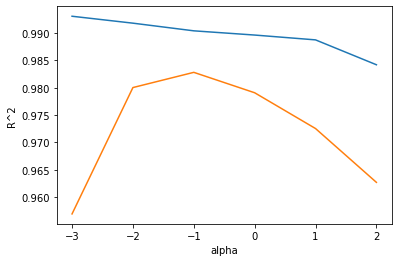

In [29]:
# 이를 시각화 해보자.
plt.plot(np.log10(alphaList), train_score)
plt.plot(np.log10(alphaList), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [31]:
# 파란색은 훈련 세트, 주황색은 테스트 세트의 결정계수 값이다.
# log10(alpha)=-1, 즉 alpha=0.1일 때 훈련/테스트 세트의 결정계수 차가 가장 작은 이상적인 값이라는 걸 알 수 있다.
# 이를 바탕으로 다시 학습해보자.

ridge = Ridge(alpha=.1)
ridge.fit(train_scaled, train_target)

print("##### Ridge model #####")
print("train R^2 value (alpha=.1): ", ridge.score(train_scaled, train_target))
print("test R^2 value (alpha=.1): ", ridge.score(test_scaled, test_target))

##### Ridge model #####
train R^2 value (alpha=.1):  0.9903815817570365
test R^2 value (alpha=.1):  0.9827976465386884


In [33]:
# 라쏘 회귀를 해보자.
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print("train: ", lasso.score(train_scaled, train_target))
print("test: ", lasso.score(test_scaled, test_target))

train:  0.989789897208096
test:  0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


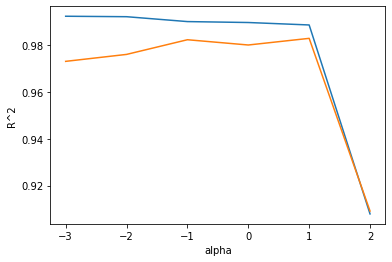

In [36]:
# 라쏘도 릿지와 마찬가지로 alpha로 규제 강도를 조절할 수 있다.
# alpha가 크면 규제를 크게하므로 덜 과대적합되도록 훈련한다.

train_score = []
test_score = []
alphaList = [.001, .01, .1, 1, 10, 100]

for alpha in alphaList:
  # 라쏘 모델을 훈련 할 때 ConvergenceWarning 경고가 발생할 수 있다.
  # 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정된 반복 횟수가 부족할 때 이런 경고가 발생한다.
  # 이 반복 횟수를 충분히 늘리기 위해 max_iter 로 지정할 수 있다.
  lasso = Lasso(alpha=alpha, max_iter=10000)
    
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))


plt.plot(np.log10(alphaList), train_score)
plt.plot(np.log10(alphaList), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

In [37]:
# log10(alpha)=1 , 즉 alpha=10 값이 최적이다.
# 해당 값으로 다시 훈련시켜보자.

lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print("##### Lasso model #####")
print("train R^2 value (alpha=10): ", lasso.score(train_scaled, train_target))
print("test R^2 value (alpha=10): ", lasso.score(test_scaled, test_target))

##### Lasso model #####
train R^2 value (alpha=10):  0.9888067471131867
test R^2 value (alpha=10):  0.9824470598706695


In [ ]:
# 특성을 많이 사용하지만 훈련/테스트 세트의 성능이 비슷하다

# 1. 특성의 스케일 정규화
# 2. 계수의 규제 - 릿지, 라쏘 회귀
# alpha를 크게 한다 -> 규제를 크게 한다. -> 계수를 작게 한다. -> 훈련세트에 과대적합되지 않도록 훈련한다.